In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
linearX_path = r'C:\Users\adity\Desktop\Notes\6th Sem\Data Science & Analysis\Lab\linearX.csv'
linearY_path = r'C:\Users\adity\Desktop\Notes\6th Sem\Data Science & Analysis\Lab\linearY.csv'

In [97]:
X = pd.read_csv(linearX_path, header=None).values.flatten()
Y = pd.read_csv(linearY_path, header=None).values.flatten()

In [99]:
if len(X) != len(Y):
    raise ValueError(f"Mismatch in sizes: X has {len(X)} elements, but Y has {len(Y)} elements.")

In [69]:
def normalize(data):
    return (data - np.mean(data)) / np.std(data)

X_normalized = normalize(X)
Y_normalized = normalize(Y)

In [71]:
X_normalized = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

In [73]:
theta = np.zeros(X_normalized.shape[1])

In [75]:
def compute_cost(X, Y, theta):
    m = len(Y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - Y) ** 2)
    return cost

In [77]:
def gradient_descent(X, Y, theta, learning_rate, iterations, convergence_threshold):
    m = len(Y)
    cost_history = []
    
    for i in range(iterations):
        predictions = X @ theta
        gradients = (1 / m) * (X.T @ (predictions - Y))
        theta -= learning_rate * gradients
        
        
        cost = compute_cost(X, Y, theta)
        cost_history.append(cost)

        
        if i > 0 and abs(cost_history[-2] - cost_history[-1]) < convergence_threshold:
            print(f"Converged after {i} iterations.")
            break

    return theta, cost_history

In [79]:
learning_rate = 0.5
iterations = 1000
convergence_threshold = 1e-6

In [81]:
final_theta, cost_history = gradient_descent(X_normalized, Y_normalized, theta, learning_rate, iterations, convergence_threshold)

Converged after 71 iterations.


In [83]:
print("Final parameters (theta):", final_theta)
print("Final cost:", cost_history[-1])

Final parameters (theta): [-0.7050201   0.66645771  1.41284814]
Final cost: 0.28545091842408915


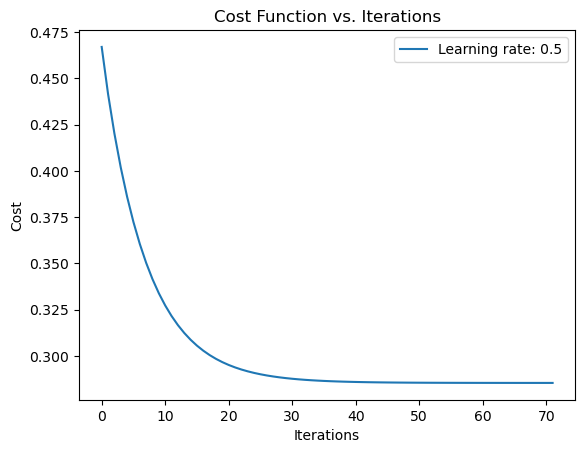

In [85]:
plt.plot(range(len(cost_history)), cost_history, label="Learning rate: 0.5")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function vs. Iterations")
plt.legend()
plt.show()

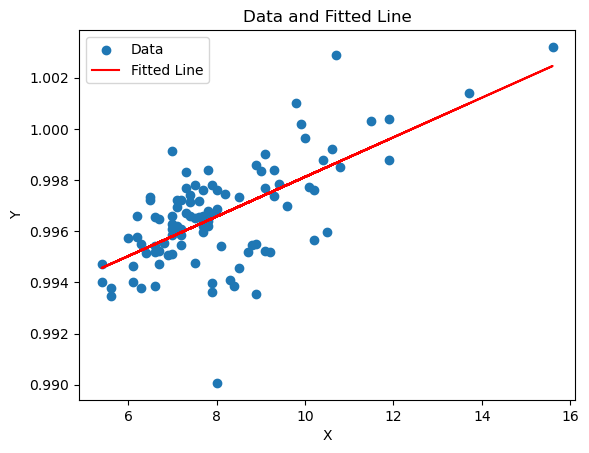

In [101]:
plt.scatter(X, Y, label="Data")
predictions = (X_normalized @ final_theta) * np.std(Y) + np.mean(Y)
plt.plot(X, predictions, color="red", label="Fitted Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Data and Fitted Line")
plt.legend()
plt.show()